In [4]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

In [134]:
df = pd.read_csv('../data/data_ford_price.csv', delimiter=";")
df.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,"36,4715","-82,4834",59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,"40,468826","-74,281734",52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,"42,477134","-82,949564",45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,"40,764373","-82,349503",49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,"49,210949","-123,11472",NaN


In [94]:
df.shape

(7017, 12)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   object 
 10  long          7017 non-null   object 
 11  weather       6837 non-null   float64
dtypes: float64(1), int64(5), object(6)
memory usage: 658.0+ KB


In [135]:
df['lat'] = df['lat'].apply(lambda x: x.replace(',', '.'))
df["lat"] = pd.to_numeric(df["lat"], errors='coerce', downcast="float")
df['long'] = df['long'].apply(lambda x: x.replace(',', '.'))
df["long"] = pd.to_numeric(df["long"], errors='coerce', downcast="float")

df.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483398,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281731,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477135,-82.949562,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764374,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114723,NaN


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float32
 10  long          7017 non-null   float32
 11  weather       6837 non-null   float64
dtypes: float32(2), float64(1), int64(5), object(4)
memory usage: 603.2+ KB


In [137]:
y = df['price']
X = df.drop(columns='price')

In [138]:
lr = linear_model.LinearRegression()
lr.fit(X, y)

ValueError: could not convert string to float: 'clean'

<Axes: >

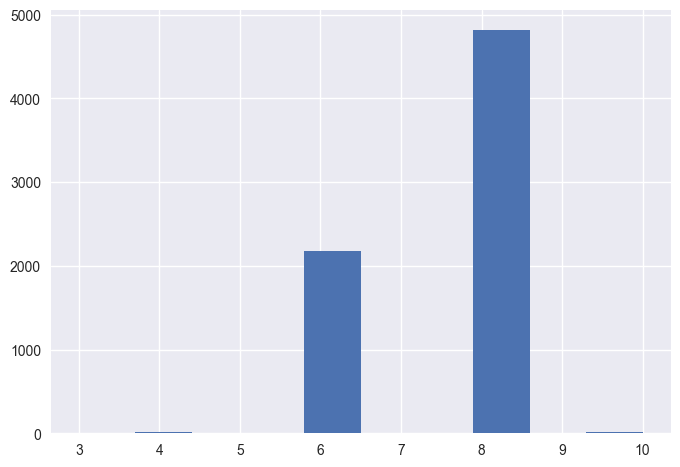

In [100]:
df['cylinders'].hist()

<Axes: >

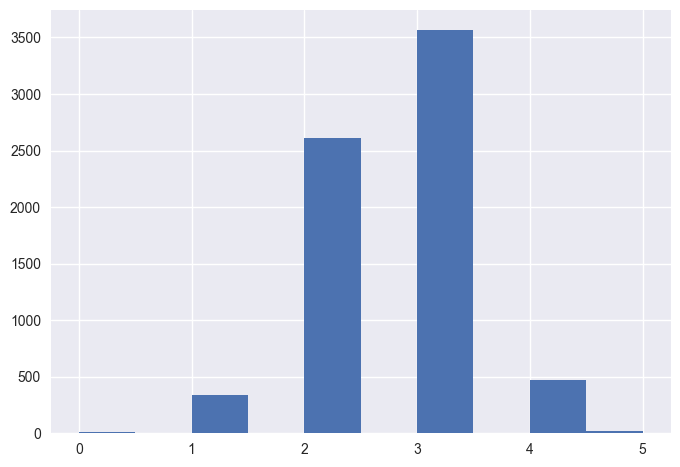

In [101]:
df['condition'].hist()

In [139]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
    print('Число уникальных значений признака {}: '.format(column), df[column].nunique())

Число уникальных значений признака cylinders:  6
Число уникальных значений признака title_status:  5
Число уникальных значений признака transmission:  3
Число уникальных значений признака drive:  3
Число уникальных значений признака size:  4


In [140]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(df[columns_to_change]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


In [141]:
df_onehot = pd.DataFrame(data_onehot, index=df.index, columns=column_names)

In [142]:
data_new = pd.concat([df, df_onehot], axis=1)
data_new = data_new.drop(columns=columns_to_change)

data_new.shape

(7017, 30)

In [143]:
data_new[~data_new['weather'].isna()].shape

(6837, 30)

In [144]:
df[~df['size'].isna()].shape[0]/df.shape[0]

0.7771127262362834

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [146]:
X = X.dropna()

In [147]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5202 entries, 0 to 7016
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5202 non-null   int64  
 1   condition     5202 non-null   int64  
 2   cylinders     5202 non-null   int64  
 3   odometer      5202 non-null   int64  
 4   title_status  5202 non-null   object 
 5   transmission  5202 non-null   object 
 6   drive         5202 non-null   object 
 7   size          5202 non-null   object 
 8   lat           5202 non-null   float32
 9   long          5202 non-null   float32
 10  weather       5202 non-null   float64
dtypes: float32(2), float64(1), int64(4), object(4)
memory usage: 447.0+ KB


In [148]:
y = y.iloc[X.index]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [150]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

columns = one_hot_encoder.get_feature_names_out(columns_to_change)
columns[:10]

array(['cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8', 'cylinders_10', 'title_status_clean',
       'title_status_lien', 'title_status_missing',
       'title_status_rebuilt'], dtype=object)

In [151]:
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
 
y_train = y_train.reset_index().drop(['index'], axis = 1)
y_test = y_test.reset_index().drop(['index'], axis = 1)

X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
 
X_train_new = X_train_new.drop(columns=columns_to_change)
X_test_new = X_test_new.drop(columns=columns_to_change)

In [ ]:
lr_model = LinearRegression()

lr_model.fit(X_train_new, y_train)

y_train_predict = lr_model.predict(X_train_new)

y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 0.647
Test R^2: 0.693


In [185]:
y = df['price']
X = df.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
 
X_train['weather'] = X_train['weather'].fillna(np.round(np.mean(X_train['weather']),0))
X_test['weather'] = X_test['weather'].fillna(np.round(np.mean(X_train['weather']),0))

In [186]:
X_train['drive'].value_counts(True).head(1)

drive
4wd    0.738406
Name: proportion, dtype: float64

In [187]:
X_train['size'].value_counts(True).head(1)

size
full-size    0.841164
Name: proportion, dtype: float64

In [188]:
X_train['size'] = X_train['size'].fillna('full-size')
X_train['drive'] = X_train['drive'].fillna('4wd')
 
X_test['size'] = X_test['size'].fillna('full-size')
X_test['drive'] = X_test['drive'].fillna('4wd')

In [189]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

columns = one_hot_encoder.get_feature_names_out(columns_to_change)
columns[:10]

array(['cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8', 'cylinders_10', 'title_status_clean',
       'title_status_lien', 'title_status_missing',
       'title_status_rebuilt'], dtype=object)

In [190]:
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
 
y_train = y_train.reset_index().drop(['index'], axis = 1)
y_test = y_test.reset_index().drop(['index'], axis = 1)

X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
 
X_train_new = X_train_new.drop(columns=columns_to_change)
X_test_new = X_test_new.drop(columns=columns_to_change)

In [191]:
lr_model = LinearRegression()

lr_model.fit(X_train_new, y_train)

y_train_predict = lr_model.predict(X_train_new)

y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 0.649
Test R^2: 0.465


# Weather

In [74]:
# Импортируем необходимые модули
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Скопируем данные в отдельную переменную
data = df.copy()
 
# В качестве тестовой выборки возьмем строки с пропусками в признаке weather
test_data = data[data['weather'].isnull()]
# И удалим эти строчки из таблицы
data.dropna(inplace=True)

# Определим целевой признак и факторы
y_train = data['weather']
X_train = data.drop(['size','weather','drive'], axis=1)
X_test = test_data.drop(['size','weather','drive'], axis=1)

# Создадим кодировщик
one_hot_encoder = OneHotEncoder()
categorial_cols = ['cylinders', 'title_status', 'transmission']

# Закодируем категориальные признаки (обучаем кодировщик только на тренировочной выборке)
X_train_onehot = one_hot_encoder.fit_transform(X_train[categorial_cols]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[categorial_cols]).toarray()

# Результаты преобразуем обратно в DataFrame для удобства
columns = one_hot_encoder.get_feature_names_out(categorial_cols)
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

# Сбросим индексы таблиц
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
y_train = y_train.reset_index().drop(['index'], axis = 1)

# Добавим результаты кодирования к исходным таблицам
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

# Удалим столбцы, которые уже были закодированы
X_train_new = X_train_new.drop(columns=categorial_cols)
X_test_new = X_test_new.drop(columns=categorial_cols)

# Создадим модель линейной регрессии и обучим ее на задачу предсказания пропусков
model = LinearRegression()
model.fit(X_train_new, y_train)

# Сделаем предсказание целевой переменной (пропущенных значений в признаке weather) 
y_pred = model.predict(X_test_new)

In [75]:
#Полученные предсказания — не что иное, как замена пропусков в столбце weather:
y_pred

array([[ 40.88029553],
       [ 40.81424464],
       [ 39.8037374 ],
       [ 41.48178273],
       [ 40.40852755],
       [ 41.2585287 ],
       [ 41.1718991 ],
       [ 39.98543864],
       [ 41.2585287 ],
       [ 40.62748764],
       [ 40.25184663],
       [ 91.73941097],
       [ 41.22431555],
       [ 41.35331117],
       [ 39.61271195],
       [ 40.88029553],
       [ 40.94628207],
       [ 40.7559617 ],
       [ 41.2585287 ],
       [ 41.08044354],
       [ 40.40852755],
       [ 41.3609726 ],
       [ 40.88954485],
       [ 40.83627424],
       [ 40.63862943],
       [ 40.84535477],
       [ 40.81683651],
       [ 39.97989437],
       [ 41.35102216],
       [ 39.79983011],
       [ 40.80611038],
       [ 40.81683651],
       [ 41.25936061],
       [ 39.71935431],
       [ 40.23353631],
       [ 39.98003062],
       [ 41.06453217],
       [ 41.06550338],
       [ 40.79686691],
       [ 40.92777772],
       [ 41.2585287 ],
       [ 70.932442  ],
       [ 30.36764548],
       [ 40

# Выбросы

In [192]:
data = df[['price', 'year', 'cylinders', 'odometer' ,'lat', 'long', 'weather']]
data.dropna(inplace = True)
 
y = data['price']
x = data.drop(columns='price')
x.head()

/var/folders/k5/kncgbhf91wx7y2rd9hqw9yqm0000gq/T/ipykernel_3385/875724902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


,year,cylinders,odometer,lat,long,weather
0,2016,6,43500,36.471500,-82.483398,59.0
1,2009,8,98131,40.468826,-74.281731,52.0
2,2002,8,201803,42.477135,-82.949562,45.0
3,2000,8,170305,40.764374,-82.349503,49.0
5,2003,8,167662,45.518032,-122.578751,50.0


In [194]:
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4682.957


In [195]:
from  sklearn.ensemble import IsolationForest
 
# ищем выбросы в обучающей выборке
iso = IsolationForest(contamination=0.1)
y_predicted = iso.fit_predict(X_train)
 
# выберем все строки, которые не являются выбросами
mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(4306, 6) (4306,)
MAE: 4452.043


In [196]:
from sklearn.neighbors import LocalOutlierFactor
 
lof = LocalOutlierFactor()
y_predicted = lof.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(3964, 6) (3964,)
MAE: 4456.542


/Users/elenko/pyprojects/pandas_venv/lib/python3.13/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


In [197]:
from sklearn.covariance import EllipticEnvelope
 
ee = EllipticEnvelope(contamination=0.01)
y_predicted = ee.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(3924, 6) (3924,)
MAE: 4455.085


# Scalers

In [198]:
data = df[['price', 'year', 'weather']]
data.dropna(inplace = True)
data_scaled = data.copy()
col_names = ['price', 'weather']
x = data_scaled[col_names]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
data_scaled[col_names] = scaler.fit_transform(x.values)
data_scaled

/var/folders/k5/kncgbhf91wx7y2rd9hqw9yqm0000gq/T/ipykernel_3385/3771041132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


,price,year,weather
0,2.558728,2016,0.862068
1,0.067373,2009,-0.017965
2,-1.072197,2002,-0.897998
3,-1.176990,2000,-0.395122
5,-0.677579,2003,-0.269403
...,...,...,...
7012,0.682100,2015,0.862068
7013,-0.767025,2005,-0.269403
7014,-0.414149,2006,0.862068
7015,-0.335138,2011,-0.646560


In [199]:
y = data_scaled['year']
x = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
 
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 3.041


In [200]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
 
data_scaled[col_names] = scaler.fit_transform(x.values)
data_scaled

,price,year,weather
0,1.982455,2016,0.571429
1,0.189460,2009,0.071429
2,-0.630672,2002,-0.428571
3,-0.706090,2000,-0.142857
5,-0.346671,2003,-0.071429
...,...,...,...
7012,0.631871,2015,0.571429
7013,-0.411044,2005,-0.071429
7014,-0.157084,2006,0.571429
7015,-0.100221,2011,-0.285714


# Квантильное преобразование

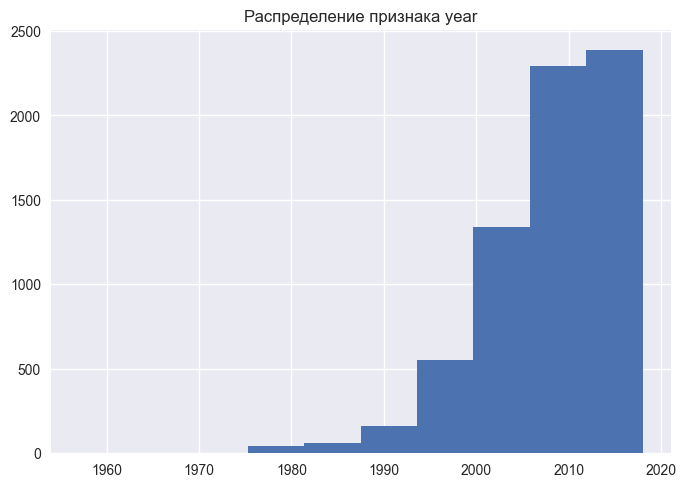

In [201]:
import matplotlib.pyplot as plt
 
plt.hist(data.year)
plt.title('Распределение признака year');

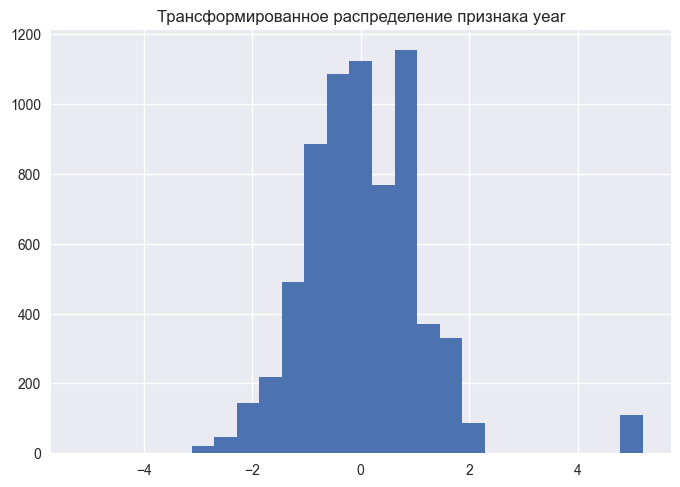

In [202]:
from sklearn.preprocessing import QuantileTransformer
# Данный трансформер принимает на вход 2D-массив, поэтому надо изменить формат данных (поскольку мы подаём на вход только один столбец)
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

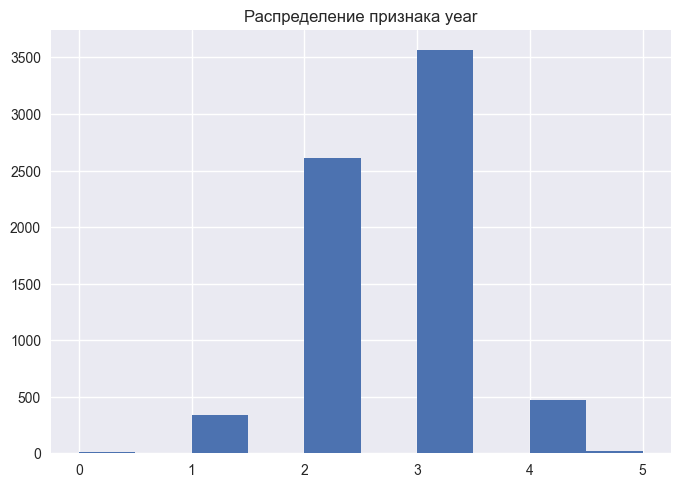

In [ ]:

plt.hist(df.condition)
plt.title('Распределение признака condition');

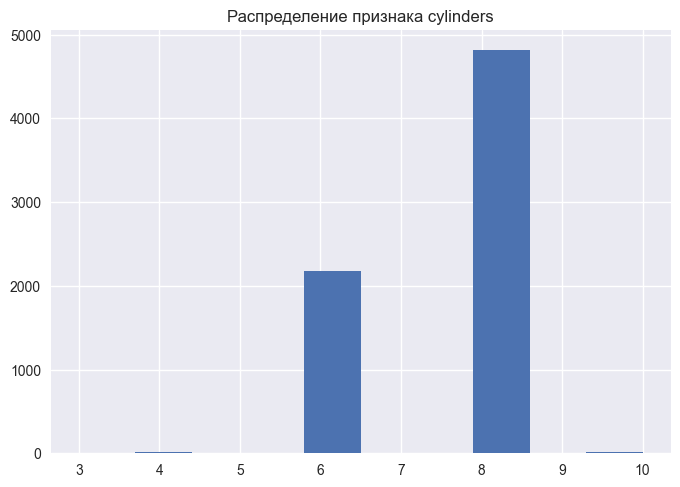

In [204]:
plt.hist(df.cylinders)
plt.title('Распределение признака cylinders');

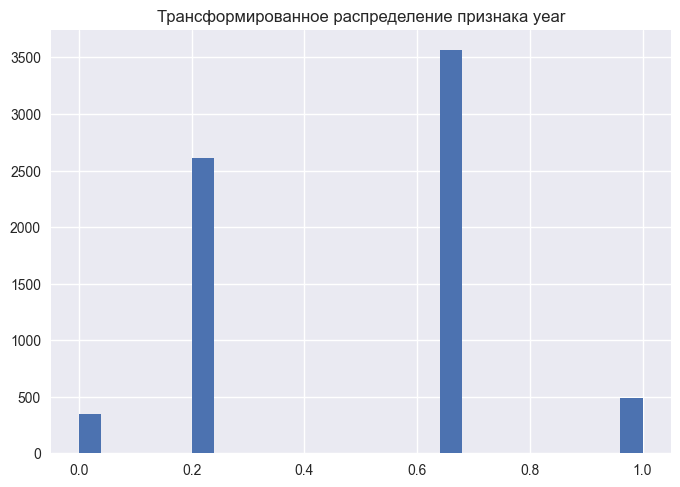

In [207]:
data_for_transform = df['condition'].values.reshape((len(df),1))
 
quantile = QuantileTransformer(output_distribution='uniform')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

In [208]:
data_transformed[0]

array([0.96396396])

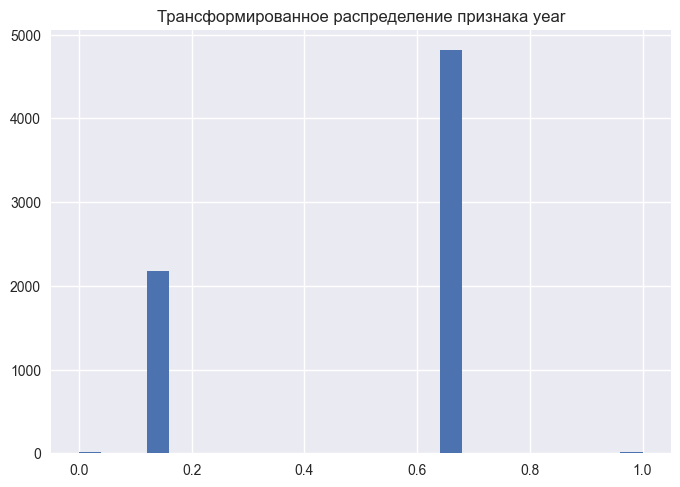

In [209]:
data_for_transform = df['cylinders'].values.reshape((len(df),1))
 
quantile = QuantileTransformer(output_distribution='uniform')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

# Log Transform

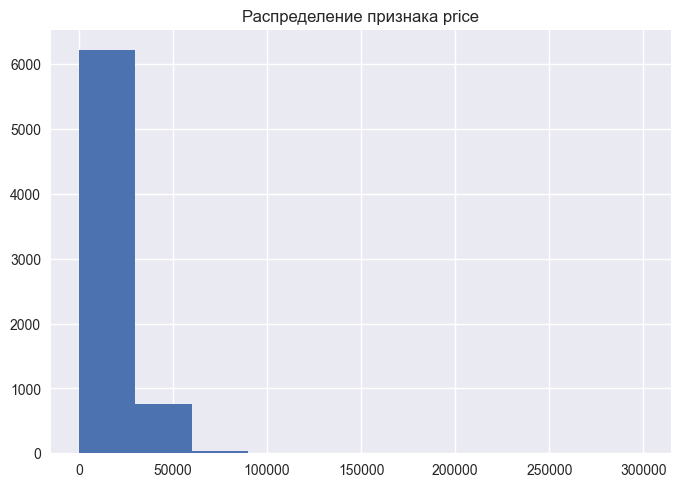

In [210]:
plt.hist(df.price)
plt.title('Распределение признака price');

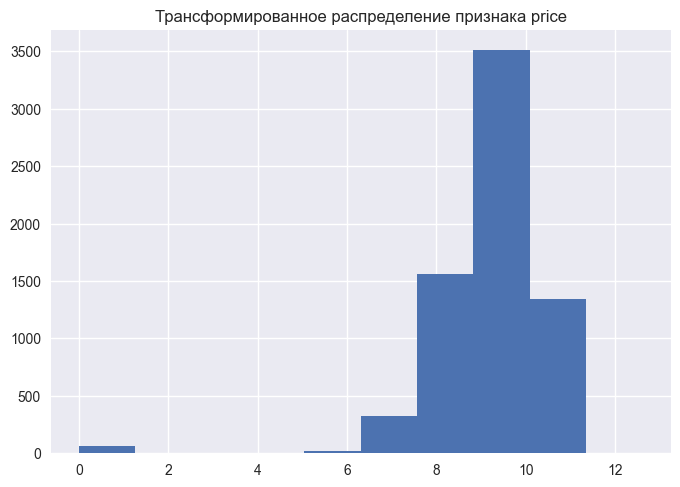

In [211]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

In [212]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)
 
price_data.describe()

,price,transformed_price
count,6837.000000,6837.000000
mean,14721.720199,9.181346
std,11404.265303,1.276723
min,1.000000,0.000000
25%,5950.000000,8.691146
50%,12488.000000,9.432523
75%,21795.000000,9.989436
max,299500.000000,12.609870


In [215]:
price_data.transformed_price

0       10.689670
1        9.647950
2        7.822044
3        7.170120
5        8.852951
          ...    
7012    10.021271
7013     8.695339
7014     9.210240
7015     9.296518
7016     9.798127
Name: transformed_price, Length: 6837, dtype: float64

# Power Transformer Scaler

In [217]:
from sklearn.preprocessing import PowerTransformer
box_cox = PowerTransformer(method = 'box-cox')
 
data_box_cox = box_cox.fit_transform(df[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

/Users/elenko/pyprojects/pandas_venv/lib/python3.13/site-packages/scipy/stats/_morestats.py:1153: UserWarning: The optimal lambda is 123.77781881071438, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)
/Users/elenko/pyprojects/pandas_venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1120: RuntimeWarning: overflow encountered in square
  temp **= 2
/Users/elenko/pyprojects/pandas_venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/elenko/pyprojects/pandas_venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/elenko/pyprojects/pandas_venv/lib/python3.13/site-p

Преобразование Бокса–Кокса, которое работает для положительных значений признака.
Преобразование Йео–Джонсона, которое учитывает при расчётах нулевые и отрицательные значения обрабатываемых переменных.

# Geo

In [221]:
df_geo = pd.read_csv('../data/data_ford_price.csv', delimiter=";")
df_geo.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,"36,4715","-82,4834",59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,"40,468826","-74,281734",52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,"42,477134","-82,949564",45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,"40,764373","-82,349503",49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,"49,210949","-123,11472",NaN


In [223]:
df_geo['lat'] = df_geo['lat'].apply(lambda x: x.replace(',', '.'))
df_geo["lat"] = pd.to_numeric(df_geo["lat"], errors='coerce', downcast="float")
df_geo['long'] = df_geo['long'].apply(lambda x: x.replace(',', '.'))
df_geo["long"] = pd.to_numeric(df_geo["long"], errors='coerce', downcast="float")

df_geo.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483398,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281731,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477135,-82.949562,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764374,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114723,NaN


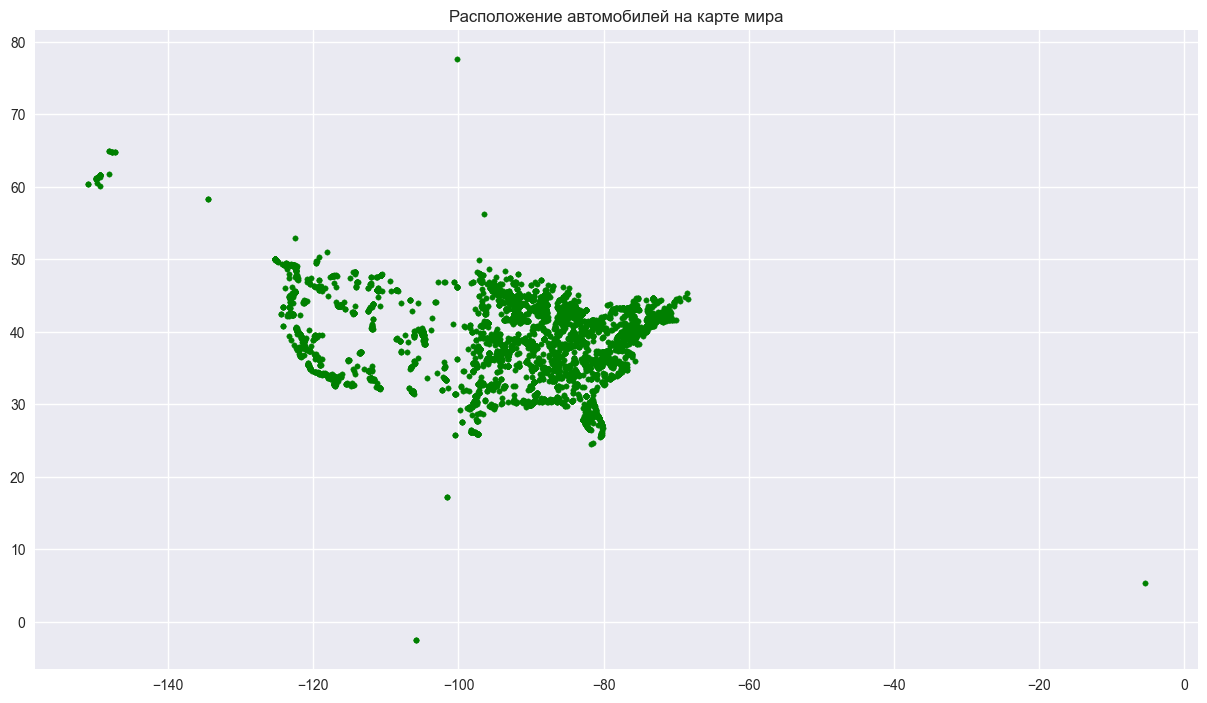

In [230]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import geodatasets
 
geometry = [Point(xy) for xy in zip(df_geo['long'], df_geo['lat'])]
gdf = GeoDataFrame(df_geo, geometry=geometry)  
 
world = gpd.read_file(geodatasets.get_path('geoda airbnb'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='green', markersize=15)
 
plt.title('Расположение автомобилей на карте мира')
plt.show()

In [232]:
import plotly.express as px
import pandas as pd
 
fig = px.scatter_geo(df_geo, lat='lat', lon='long', hover_name="price")
fig.update_layout(title = 'Интерактивная карта цены автомобиля в зависимости от локации', title_x=1)
fig.show()

In [234]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

Latitude = str(df_geo['lat'][0])
Longitude =  str(df_geo['long'][0])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

GeocoderInsufficientPrivileges: Non-successful status code 403

# Методы отбора признаков 

In [242]:
df_var = pd.read_csv('../data/data_ford_price.csv', delimiter=";")

df_var = df_var[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
df_var.dropna(inplace = True)

df_var['lat'] = df_var['lat'].apply(lambda x: x.replace(',', '.'))
df_var["lat"] = pd.to_numeric(df_var["lat"], errors='coerce', downcast="float")
df_var['long'] = df_var['long'].apply(lambda x: x.replace(',', '.'))
df_var["long"] = pd.to_numeric(df_var["long"], errors='coerce', downcast="float")

df_var.head()

,price,year,cylinders,odometer,lat,long,weather
0,43900,2016,6,43500,36.471500,-82.483398,59.0
1,15490,2009,8,98131,40.468826,-74.281731,52.0
2,2495,2002,8,201803,42.477135,-82.949562,45.0
3,1300,2000,8,170305,40.764374,-82.349503,49.0
5,6995,2003,8,167662,45.518032,-122.578751,50.0


In [243]:
y = df_var['price']
X = df_var.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.feature_selection import RFE
 
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
selector.get_feature_names_out() # важные признаки

array(['year', 'cylinders', 'lat'], dtype=object)

In [245]:
X_train.columns

Index(['year', 'cylinders', 'odometer', 'lat', 'long', 'weather'], dtype='object')

In [246]:
selector. ranking_

array([1, 1, 4, 1, 3, 2])

In [247]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)

* коэффициента корреляции Пирсона: f_regression();
* дисперсионного анализа ANOVA: f_classif();
* хи-квадрата: chi2();
* взаимной информации: mutual_info_classif() и mutual_info_regression().